In [1]:
from ml_pipeline import experiment

/home/rutger/miniconda3/envs/pynlp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
2022-09-23 11:46:04.992611: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2022-09-23 11:46:04.992634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
res = experiment.run(
    task_name='vua_format',
    data_dir='../pynlp/data/dataset1/',
    pipeline_name='naive_bayes_counts',
    print_predictions=False
)

>> Running vua_format experiment
>> Loading data...
>> retrieving train/data instances...
>> training pipeline naive_bayes_counts
>> testing...
>> evaluation...
              precision    recall  f1-score   support

         CAG       0.30      0.43      0.35       555
         NAG       0.70      0.52      0.60      1113
         NOT       0.46      0.93      0.61       620
         OAG       0.43      0.29      0.34       505
         OFF       0.34      0.31      0.33       240
        hate       0.80      0.10      0.18       239
      noHate       0.36      0.03      0.06       239

    accuracy                           0.47      3511
   macro avg       0.48      0.37      0.35      3511
weighted avg       0.51      0.47      0.44      3511



In [3]:
import pandas as pd

In [4]:
d1_test = pd.read_csv('../pynlp/data/dataset1/testData.csv', delimiter='\t')

In [5]:
res

Pipeline(steps=[('prep',
                 <ml_pipeline.preprocessing.Preprocessor object at 0x7fe3784c7850>),
                ('frm', CountVectorizer()), ('clf', MultinomialNB())])

In [6]:
prep = res['prep']
frm = res['frm']
clf = res['clf']

In [7]:
res = prep.transform(d1_test['Text'])
res = frm.transform(res)
pred = clf.predict(res)

In [8]:
d1_test['Pred'] = pred

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted Label', ylabel='True Label'>

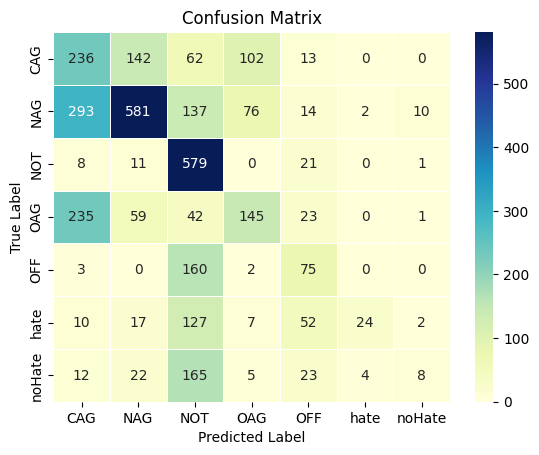

In [10]:
stats = d1_test.groupby(['Label', 'Pred'])[['Id']].count().reset_index()
stats = stats.pivot(index='Label', columns='Pred', values='Id')
stats = stats.fillna(0)
stats = stats.astype(int)
fig = sns.heatmap(
    stats
    , annot=True
    , fmt="d"
    , linewidths=.5
    , cmap="YlGnBu"
)
fig.set_title('Confusion Matrix')
fig.set_xlabel('Predicted Label')
fig.set_ylabel('True Label')
fig

* `NAG` (Not Aggressive) texts are more often confused with `CAG` (Covertly Aggressive) than `noHate` and `NOT`. This is probably due to pecularities of the datasets which is being overfit on.